In [1]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
import sys
import os

folder = '../../../../crispy'
print(folder)
if folder not in sys.path: sys.path.append(folder)

from crispy.params import Params
folder = '../../../crispy'
par = Params(folder)

from crispy.tools.initLogger import getLogger
log = getLogger('crispy')
from crispy.IFS import polychromeIFS
from crispy.IFS import reduceIFSMap
from crispy.tools.imgtools import scale2imgs,bowtie
from crispy.tools.image import Image
from crispy.tools.rotate import rotateCube,shiftCube
from crispy.tools.postprocessing import mf,recenter_offaxis
from crispy.tools.inputScene import adjust_krist_header
from crispy.tools.detector import averageDetectorReadout
from astropy.io import fits
import astropy.units as u
from crispy.tools.postprocessing import construct_mflib,convolved_mf


Populating the interactive namespace from numpy and matplotlib
../../../../crispy


In [2]:
lamc=660.
BW = 0.18
par.nonoise=False
sampling=2.0
par.timeframe=1000
par.Nreads = par.timeframe/100.
par.PCmode=True
par.EMStats=True
par.poisson=True
par.lifefraction = 0.0
par.lenslet_sampling=1./sampling
folder = '/Users/mrizzo/IFS/OS5_SIM_'+str(sampling)+'_t'+str(int(par.timeframe))
# folder = '/Users/mrizzo/IFS/OS5_SIM_'+str(sampling)+'_noiseless'
offaxis_psf_filename='/Users/mrizzo/IFS/OS5/offaxis/spc_offaxis_psf.fits'
OS5_files = '/Users/mrizzo/IFS/OS5/with_lowfc/'

try:
    os.makedirs(folder)
    os.makedirs(folder+'/average')
    os.makedirs(folder+'/detector')  
except OSError:
    pass
par.hdr
from crispy.tools.postprocessing import process_SPC_IFS2


In [3]:
# from crispy.unitTests import testCreateFlatfield
# testCreateFlatfield(par,pixsize=0.1,npix = 512,Nspec=45,pixval = 1.,useQE=True)
# from crispy.IFS import reduceIFSMap
# reduceIFSMap(par,par.unitTestsOutputs+'/flatfield.fits')


### Reconstruct the matched filter library as needed

In [4]:
# from crispy.tools.postprocessing import construct_mflib
# planet_cube_path = folder+'/average'+"/offaxis_planet_red_optext.fits"
# IWA=2.7
# OWA=9
# plcube = Image(planet_cube_path).data
# ydim = plcube.shape[1]
# xdim = plcube.shape[2]
# mask,scratch = bowtie(plcube[0],ydim//2-1,xdim//2,openingAngle=60,
#             clocking=-par.philens*180./np.pi,
#             IWApix=IWA*lamc/par.lenslet_wav/par.lenslet_sampling,
#             OWApix=OWA*lamc/par.lenslet_wav/par.lenslet_sampling,
#             export=None,twomasks=False)    

# construct_mflib(par,planet_cube=planet_cube_path,
#                 threshold=0.2,
#                 lamc=lamc,
#                 BW=BW,
#                 outdir=folder+'/average',
#                 mask=mask,
#                 trim=30,
#                 outname = 'mflib.fits.gz',
#                 order=3)


In [13]:

signal, noise,noise_no_source,noise_no_rdi,signal_planet,signal_star,signal_no_rdi,signal_no_source = process_SPC_IFS2(par,
                    psf_time_series_folder=OS5_files,
                    offaxis_psf_filename=offaxis_psf_filename,
                    xshift=0.0,yshift=0.0,
                    lamc=lamc,BW=BW,n_ref_star_imgs=30,
                    tel_pupil_area=3.650265060424805*u.m**2,
                    IWA = 2.5,OWA = 9.,
#                     albedo_filename='Jupiter_1x_5AU_90deg.dat',
#                     planet_radius = 1.27,
#                     planet_AU = 3.6,planet_dist_pc=14.1,
                    albedo_filename='LAS_spectra_for_exospec_bright_comparison_at_90_deg_phase.txt',
                    albedo=None,
                    planet_radius = 1.0,
                    planet_AU = 3.0,planet_dist_pc=10.,
#                     target_star_T=5887*u.K, target_star_Vmag=5.03,   # 47 Uma
                    target_star_T=5778*u.K, target_star_Vmag=4.83,     # fiducial Sun at 10 pc
                    forced_inttime_ref = 10., # forced integration time for reference star individual frame
                    forced_tottime_ref = 10., # forced integration time for reference star frame group
                    pp_fact = 0.00,
                    RDI=False,
                    mflib='',
                    outdir_time_series = folder,
                    outdir_detector=folder+'/detector',
                    outdir_average=folder+'/average',
                    process_cubes=False, # this only needs to be turned to True once
                    process_offaxis_files=True, # Construct planet and off-axis star files
                    process_detector=True, # Construct IFS detector maps
                    take_averages=True,   # Take averages of these detector maps
                    subtract_dark=True,
                    normalize_cubes=True,
                    nosource=False)


crispy - INFO - Read data from HDU 0 of /Users/mrizzo/IFS/OS5/with_lowfc/os5_spc_001.fits
crispy - INFO - X,Y Shift in px in original cubes: 0.00, 0.00
crispy - INFO - Read data from HDU 0 of /Users/mrizzo/IFS/OS5/with_lowfc/os5_spc_031.fits
crispy - INFO - Recentering off-axis cube
crispy - INFO - Read data from HDU 0 of /Users/mrizzo/IFS/OS5/offaxis/spc_offaxis_psf.fits
crispy - INFO - The number of input pixels per lenslet is 5.000000
crispy - INFO - Writing data to /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/average/offaxiscube.fits
crispy - INFO - Constructing off-axis cube at planet separation: 5.22 lam/D (0.30 arcsec, 10.45 lenslets)
crispy - INFO - Writing data to /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/average/offaxiscube_shifted.fits
crispy - INFO - Writing data to /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/average/offaxiscube_star_processed.fits
crispy - INFO - The number of input pixels per lenslet is 5.000000
crispy - INFO - Using PSFlet gaussian approximation
crispy - WARNING - Assuming sli

In [14]:
signal_planet,signal

(array([  1.31144820e-08,   1.29562504e-08,   1.27678469e-08,
          1.27581843e-08,   1.29253763e-08,   1.30681740e-08,
          1.30842899e-08,   1.30266413e-08,   1.29445521e-08,
          1.28678173e-08,   1.28404091e-08,   1.28755353e-08,
          1.29188427e-08,   1.29159158e-08,   1.28578515e-08,
          1.27645308e-08,   1.26804680e-08,   1.25918058e-08,
          1.24808203e-08]),
 array([  1.32597820e-08,   1.15147111e-08,   1.21326899e-08,
          1.35772664e-08,   1.23324786e-08,   1.28287248e-08,
          1.32297099e-08,   1.19598426e-08,   1.21089126e-08,
          1.33224457e-08,   1.15176781e-08,   1.27466750e-08,
          1.22407932e-08,   1.20952685e-08,   1.19000185e-08,
          1.22411438e-08,   1.20718596e-08,   1.21294387e-08,
          1.16807414e-08]))

In [5]:
noise

[7.0868750111674888e-11,
 5.192322045092702e-11,
 5.556230185411732e-11,
 5.3108669378157519e-11,
 5.0360396537992005e-11,
 6.2673880810160705e-11,
 5.4208128482672487e-11,
 4.9448805391835246e-11,
 7.8209848560012645e-11,
 6.3947301602652771e-11,
 5.1857196027154329e-11,
 6.2106168879002913e-11,
 5.8606470250021153e-11,
 6.4499349772609623e-11,
 6.3339900187393843e-11,
 7.1487806016042008e-11,
 7.2079598812572615e-11,
 8.3502740708688697e-11,
 1.0662488698612722e-10]

In [6]:
noise_no_rdi

[7.0868750111674888e-11,
 5.192322045092702e-11,
 5.556230185411732e-11,
 5.3108669378157519e-11,
 5.0360396537992005e-11,
 6.2673880810160705e-11,
 5.4208128482672487e-11,
 4.9448805391835246e-11,
 7.8209848560012645e-11,
 6.3947301602652771e-11,
 5.1857196027154329e-11,
 6.2106168879002913e-11,
 5.8606470250021153e-11,
 6.4499349772609623e-11,
 6.3339900187393843e-11,
 7.1487806016042008e-11,
 7.2079598812572615e-11,
 8.3502740708688697e-11,
 1.0662488698612722e-10]

In [7]:
noise_no_source

[7.0868750111674888e-11,
 5.192322045092702e-11,
 5.556230185411732e-11,
 5.3108669378157519e-11,
 5.0360396537992005e-11,
 6.2673880810160705e-11,
 5.4208128482672487e-11,
 4.9448805391835246e-11,
 7.8209848560012645e-11,
 6.3947301602652771e-11,
 5.1857196027154329e-11,
 6.2106168879002913e-11,
 5.8606470250021153e-11,
 6.4499349772609623e-11,
 6.3339900187393843e-11,
 7.1487806016042008e-11,
 7.2079598812572615e-11,
 8.3502740708688697e-11,
 1.0662488698612722e-10]

In [14]:
np.savetxt(folder+"/average/signal.txt",signal)
np.savetxt(folder+"/average/noise.txt",noise)
np.savetxt(folder+"/average/noise_no_rdi.txt",noise_no_rdi)
np.savetxt(folder+"/average/noise_no_source.txt",noise_no_source)


crispy - INFO - Reduced cube will have 19 wavelength bins


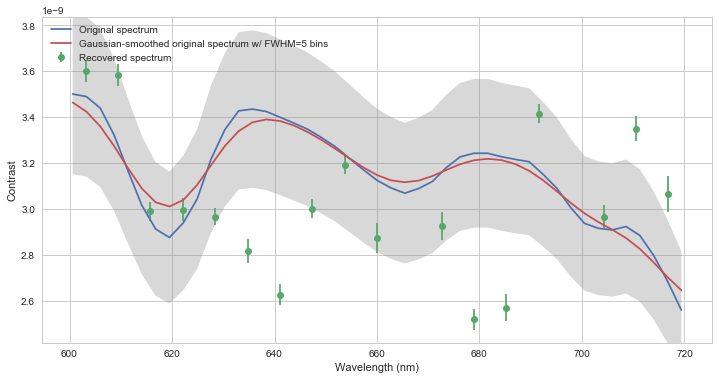

In [15]:
from crispy.tools.postprocessing import SNR_spectrum
from crispy.tools.reduction import calculateWaveList
signal = np.loadtxt(folder+"/average/signal.txt")
noise = np.loadtxt(folder+"/average/noise.txt")
# noise = np.loadtxt(folder+"/average/noise_no_rdi.txt")
# noise = np.loadtxt(folder+"/average/noise_no_source.txt")
lam_midpts,junk = calculateWaveList(par,method='optext')
wavelist = lamc*np.linspace(1.-BW/2.,1.+BW/2.,45)
plt.figure(figsize=(20,12))
ratio_out = SNR_spectrum(lam_midpts,signal,noise,filename=par.codeRoot+"/Inputs/LAS_spectra_for_exospec_bright_comparison_at_90_deg_phase.txt",albedo=None,lam_contrast=wavelist,outfolder=par.exportDir+"/",
             FWHM=2*45./19.,FWHMdata=2,edges=1,ymargin=0.1,title='',planet_radius=1,planet_AU = 3.0)
# plt.figure(figsize=(20,12))
# ratio_out = SNR_spectrum(lam_midpts,signal_star,noise,filename=par.codeRoot+'/Inputs/Jupiter_1x_5AU_90deg.dat',lam_contrast=wavelist,outfolder=par.exportDir+"/",
#              FWHM=2*45./19.,FWHMdata=2,edges=1,ymargin=3,title='')
#np.savetxt(folder+"/average/ratio.txt",ratio_out)
plt.savefig(folder+'/average/SNR.png',dpi=300)


In [16]:
from IPython.display import clear_output
Ntrials=100
final_signal_cube = np.zeros((Ntrials,len(signal)))
final_signal = np.zeros(len(signal))
final_variance = np.zeros(len(signal))

import time
start = time.time()

for i in range(Ntrials):
    clear_output()
    print "iteration",i
    signal,_,_,_,_,_,_,_ = process_SPC_IFS2(par,
                    psf_time_series_folder=OS5_files,
                    offaxis_psf_filename=offaxis_psf_filename,
                    xshift=0.0,yshift=0.0,
                    lamc=lamc,BW=BW,n_ref_star_imgs=30,
                    tel_pupil_area=3.650265060424805*u.m**2,
                    IWA = 2.5,OWA = 9.,
#                     albedo_filename='Jupiter_1x_5AU_90deg.dat',
#                     planet_radius = 1.27,
#                     planet_AU = 3.6,planet_dist_pc=14.1,
                    albedo_filename='LAS_spectra_for_exospec_bright_comparison_at_90_deg_phase.txt',
                    albedo=None,
                    planet_radius = 1.0,
                    planet_AU = 3.0,planet_dist_pc=10.,
#                     target_star_T=5887*u.K, target_star_Vmag=5.03,   # 47 Uma
                    target_star_T=5778*u.K, target_star_Vmag=4.83,     # fiducial Sun at 10 pc
                    forced_inttime_ref = 10., # forced integration time for reference star individual frame
                    forced_tottime_ref = 10., # forced integration time for reference star frame group
                    pp_fact = 0.00,
                    RDI=False,
                    mflib='',
                    outdir_time_series = folder,
                    outdir_detector=folder+'/detector',
                    outdir_average=folder+'/average',
                    process_cubes=False, # this only needs to be turned to True once
                    process_offaxis_files=False, # Construct planet and off-axis star files
                    process_detector=True, # Construct IFS detector maps
                    take_averages=True,   # Take averages of these detector maps
                    subtract_dark=True,
                    normalize_cubes=True,
                    nosource=False)
    final_signal += signal
    final_variance += signal**2
    final_signal_cube[i] = signal
final_signal /= Ntrials
final_variance /= Ntrials
final_variance -= final_signal**2
end = time.time()
print("Time elapsed: %f" % (end - start))
np.savetxt(folder+"/average/final_signal_cube_sergi_27hrs.txt",final_signal_cube)



iteration 99
crispy - INFO - Read data from HDU 0 of /Users/mrizzo/IFS/OS5/with_lowfc/os5_spc_001.fits
crispy - INFO - X,Y Shift in px in original cubes: 0.00, 0.00
crispy - INFO - Read data from HDU 0 of /Users/mrizzo/IFS/OS5/with_lowfc/os5_spc_031.fits
crispy - INFO - Taking average of reference star
crispy - INFO - Apply detector readout on os5_spc_001_refstar_IFS.fits
crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/os5_spc_001_refstar_IFS.fits
crispy - INFO - Nreads: 1
crispy - INFO - Writing data to /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/detector/os5_spc_001_refstar_IFS_detector.fits
crispy - INFO - Apply detector readout on os5_spc_002_refstar_IFS.fits
crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/os5_spc_002_refstar_IFS.fits
crispy - INFO - Nreads: 1
crispy - INFO - Writing data to /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/detector/os5_spc_002_refstar_IFS_detector.fits
crispy - INFO - Apply detector readout on os5_spc_003_refstar_

[  3.43623291e-09   3.20858415e-09   2.93366441e-09   2.95639542e-09
   3.11025924e-09   3.28304375e-09   3.35138772e-09   3.24585487e-09
   3.13126501e-09   3.13838697e-09   3.10382925e-09   3.05463512e-09
   3.12172425e-09   3.10611498e-09   3.15704809e-09   3.03675611e-09
   2.91026093e-09   2.77491339e-09   2.69639626e-09]


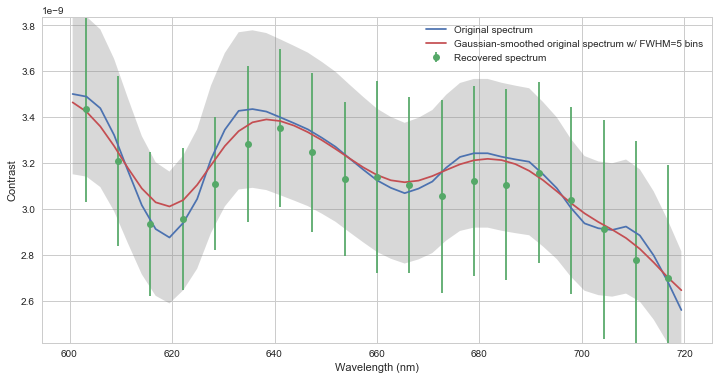

In [18]:
plt.figure(figsize=(20,12))
ratio_out = SNR_spectrum(lam_midpts,final_signal,np.sqrt(final_variance),filename=par.codeRoot+"/Inputs/LAS_spectra_for_exospec_bright_comparison_at_90_deg_phase.txt",albedo=None,lam_contrast=wavelist,outfolder=par.exportDir+"/",
             FWHM=2*45./19.,FWHMdata=2,edges=1,ymargin=0.1,title='',planet_radius=1,planet_AU = 3.0)


In [10]:
print np.sqrt(final_variance)
np.savetxt(folder+"/average/final_signal_cube_rdi_t1000.txt",final_signal_cube)
print final_signal_cube.shape

[  7.70349613e-10   6.45917443e-10   5.98690405e-10   6.50258837e-10
   5.97694748e-10   5.21663576e-10   6.71339589e-10   6.11220601e-10
   6.41041027e-10   6.47267463e-10   7.42713917e-10   6.95623772e-10
   7.76652778e-10   7.55446880e-10   8.46172790e-10   7.75694876e-10
   9.12075605e-10   9.20955939e-10   9.26600990e-10]
(100, 19)


(100, 19)


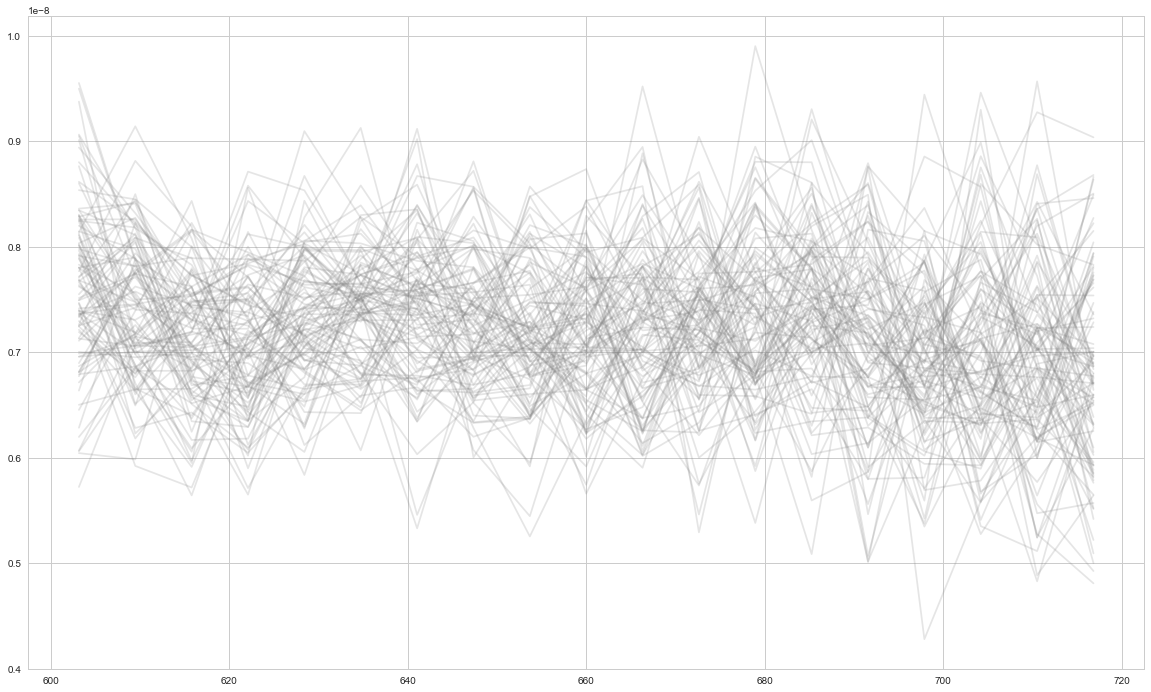

In [11]:
plt.figure(figsize=(20,12))
fsc = np.loadtxt(folder+"/average/final_signal_cube_rdi_t1000.txt")
print fsc.shape
for i in range(final_signal_cube.shape[0]):
    plt.plot(lam_midpts,fsc[i],color='Gray',alpha=0.2)

In [27]:
ref_star = fits.getdata(folder+'/average'+'/average_ref_star_detector_red_optext_flatfielded.fits')
target_star_planet = fits.getdata(folder+'/average'+'/average_target_star_detector_red_optext_flatfielded.fits')
target_star = fits.getdata(folder+'/average'+'/average_target_star_nosource_detector_red_optext_flatfielded.fits')
planet = target_star_planet - target_star
planet = fits.getdata(folder+'/average'+'/offaxis_planet_red_optext_flatfielded.fits')
rdi_residual = fits.getdata(folder+'/average'+"/lstsq_residual.fits")
trim = 31


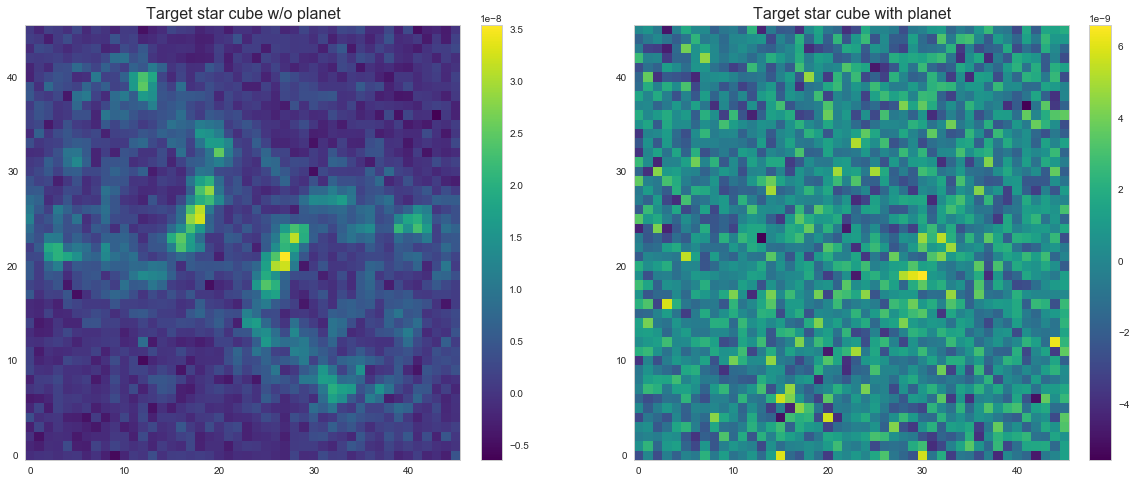

In [28]:
import ipywidgets
def plt_cubes_slices(wchan):
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    plt.imshow(target_star[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.title("Target star cube w/o planet",fontsize=16)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.grid(False)
    plt.subplot(122)
    plt.imshow(target_star_planet[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.title("Target star cube with planet",fontsize=16)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.grid(False)
ipywidgets.interact(plt_cubes_slices, wchan=(1,planet.shape[0]));

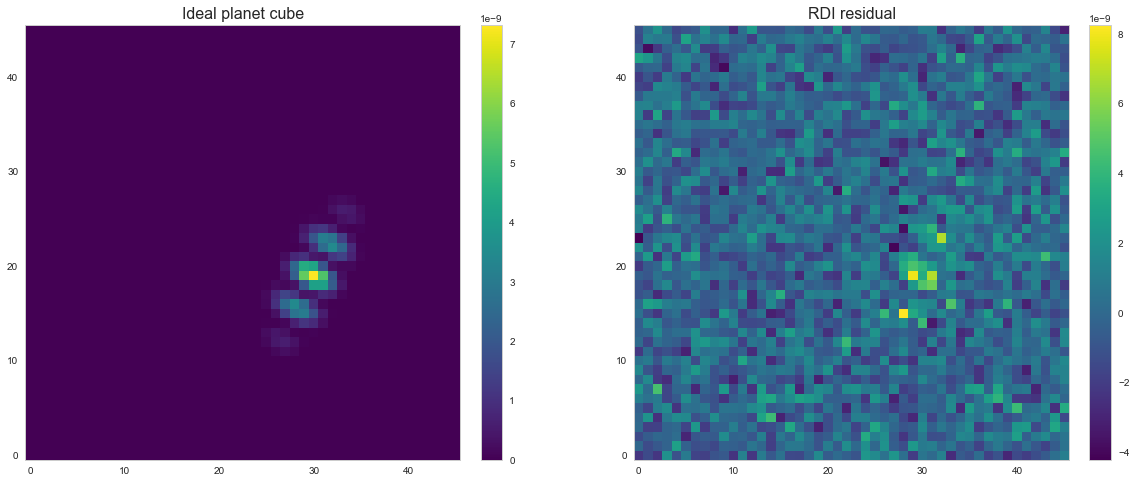

In [14]:
def plt_cubes_slices(wchan):
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    plt.imshow(planet[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.title("Ideal planet cube",fontsize=16)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.grid(False)
    plt.subplot(122)
    plt.imshow(rdi_residual[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.title("RDI residual",fontsize=16)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.grid(False)
ipywidgets.interact(plt_cubes_slices, wchan=(1,planet.shape[0]));

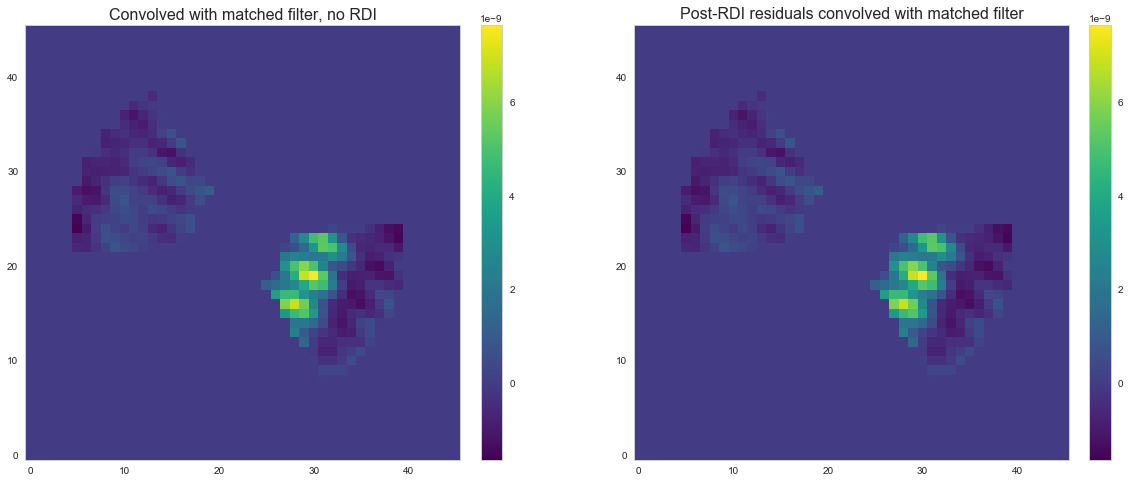

In [15]:
convolved_no_rdi_normalized = fits.getdata(folder+'/average'+'/convolved_no_rdi_normalized.fits')
convolved_normalized = fits.getdata(folder+'/average'+'/convolved_normalized.fits')


def plt_cubes_slices(wchan):
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    plt.imshow(convolved_no_rdi_normalized[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.title("Convolved with matched filter, no RDI",fontsize=16)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.grid(False)
    plt.subplot(122)
    plt.imshow(convolved_normalized[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.title("Post-RDI residuals convolved with matched filter",fontsize=16)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.grid(False)
ipywidgets.interact(plt_cubes_slices, wchan=(1,planet.shape[0]));

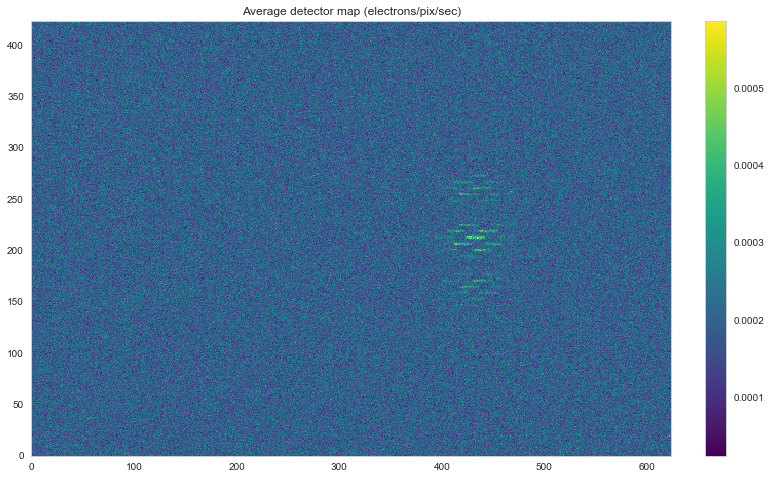

In [16]:
plt.figure(figsize=(15,8))
detector_map = fits.getdata(folder+'/average'+'/average_target_star_detector.fits')
plt.imshow(detector_map[300:-300,200:-200],cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Average detector map (electrons/pix/sec)")
plt.grid(False)

<Container object of 3 artists>

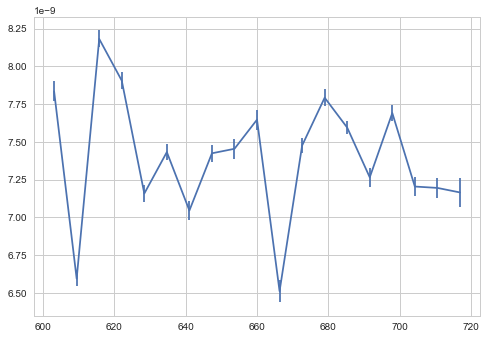

In [17]:
plt.errorbar(lam_midpts,signal,yerr=noise)

## Manual RDI on data products, to test that it works

(19, 108, 108)
[[  3.43100804e-10  -1.59386138e-01]
 [  2.68128125e-10  -2.74966571e-01]
 [  2.36652432e-10   7.92785505e-02]
 [  3.22215168e-10   6.88924571e-02]
 [  3.41806694e-10  -1.87547965e-01]
 [  2.21904605e-10  -1.09867385e-01]
 [  2.63756764e-10  -1.21436268e-02]
 [  3.33429779e-10   2.20233876e-02]
 [  3.53031652e-10  -2.29250511e-01]
 [  1.98710639e-10  -6.56170322e-02]
 [  2.51163357e-10   3.41574511e-03]
 [  2.61874415e-10   3.16698065e-02]
 [  3.91276081e-10  -4.04065205e-02]
 [  3.25336612e-10  -3.89287095e-02]
 [  3.28038076e-10  -1.02693600e-01]
 [  2.72233160e-10  -2.34797595e-02]
 [  4.19583401e-10  -2.55314993e-01]
 [  4.08664282e-10  -9.39646271e-02]
 [  4.44284248e-10  -2.01058315e-01]]
(19, 2)


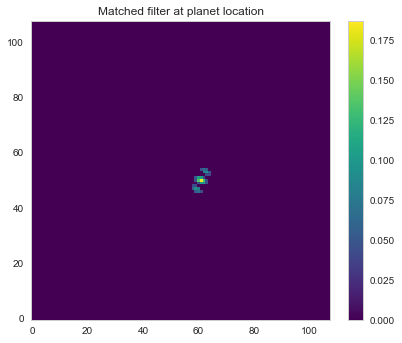

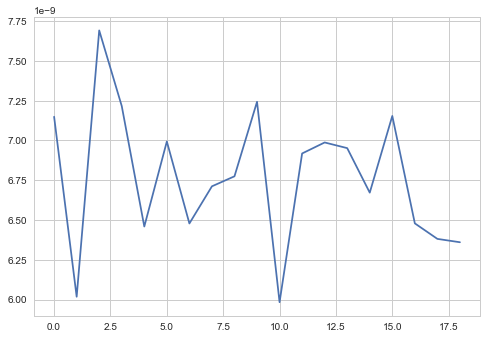

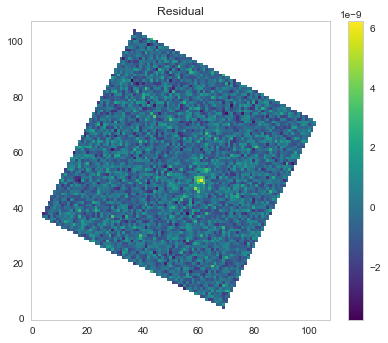

In [18]:
OA = 65
IWA = 2.5
OWA = 9.
lamc=660.
ref_star = fits.open(folder+'/average'+'/average_ref_star_detector_red_optext_flatfielded.fits')[1]
target_star_planet = fits.open(folder+'/average'+'/average_target_star_detector_red_optext_flatfielded.fits')[1]
target_star = fits.open(folder+'/average'+'/average_target_star_nosource_detector_red_optext_flatfielded.fits')[1]

ydim,xdim = ref_star.data[0].shape
mask,scratch = bowtie(ref_star.data[0],ydim//2-1,xdim//2,openingAngle=OA,
        clocking=-par.philens*180./np.pi,
        IWApix=IWA*lamc/par.lenslet_wav/par.lenslet_sampling,
        OWApix=OWA*lamc/par.lenslet_wav/par.lenslet_sampling,
        export=None,twomasks=False)    

offaxis = fits.open(folder+'/average'+'/offaxis_planet_red_optext.fits')[1]
print offaxis.data.shape
matched_filter = mf(offaxis,mask,0.2)
plt.imshow(matched_filter[10],cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Matched filter at planet location")
plt.grid(False)
coefs,est = scale2imgs(target_star_planet,
                            ref_star,
                            bowtie_mask = mask,
                            returndiff = False,
                            returnest = True)

rdi_planet = target_star_planet.data - est
print coefs
mf_rdi_planet = matched_filter*rdi_planet
rdi_planet_spectrum = np.nansum(np.nansum(mf_rdi_planet, axis=2), axis=1)
plt.figure()
print coefs.shape
plt.plot(rdi_planet_spectrum)
plt.figure()
plt.imshow(rdi_planet[10],cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Residual")
plt.grid(False)


(334,)


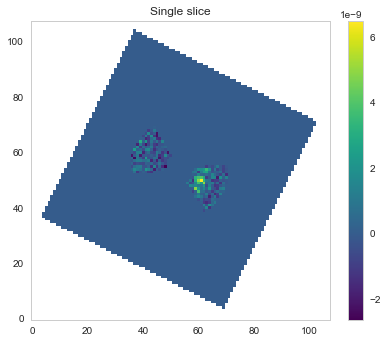

In [19]:
targetslice = np.reshape(target_star_planet.data[10,mask],-1)
print targetslice.shape
targetslice = target_star_planet.data[10,:]
plt.imshow(targetslice*mask,cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Single slice")
plt.grid(False)


(2, 334)
334 (19, 108, 108) (19, 334)


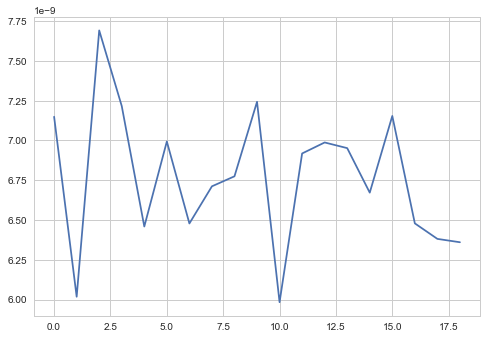

In [20]:
import scipy
data_mask,scratch = bowtie(ref_star.data[0],ydim//2-1,xdim//2,openingAngle=OA,
        clocking=-par.philens*180./np.pi,
        IWApix=IWA*lamc/par.lenslet_wav/par.lenslet_sampling,
        OWApix=OWA*lamc/par.lenslet_wav/par.lenslet_sampling,
        export=None,twomasks=False)    
data_ind = np.nonzero(data_mask)
nan_ind = np.nonzero(~data_mask)
N_pix = len(data_ind[0])
N_mask = len(nan_ind[0])
print np.array(data_ind).shape

data_mask_nan = np.zeros(data_mask.shape)       
data_mask_nan[nan_ind[0][:], nan_ind[1][:]] = np.nan
data_mask_nan[data_ind[0][:], data_ind[1][:]] = True

masked_ref_star = data_mask_nan*ref_star.data
masked_target_star = data_mask_nan*target_star.data
masked_target_star_planet = data_mask_nan*target_star_planet.data

target_star_vec = target_star.data[:,data_ind[0],data_ind[1]]
target_star_planet_vec = target_star_planet.data[:,data_ind[0],data_ind[1]]
ref_star_vec = ref_star.data[:,data_ind[0],data_ind[1]]

Nw = ref_star.data.shape[0]
linregress_coeff = np.zeros((Nw, 2))
target_star_est_vec = np.zeros_like(target_star_planet_vec)
target_star_est = np.zeros_like(ref_star.data)

for wi in range(Nw):
    b, a, _, _, _ = scipy.stats.linregress(ref_star_vec[wi,:], target_star_planet_vec[wi,:])
    linregress_coeff[wi, 0] = a
    linregress_coeff[wi, 1] = b
    target_star_est_vec[wi] = a + b*ref_star_vec[wi]
    #target_star_est_vec[wi] = b*ref_star_vec[wi]

print N_pix,target_star_est.shape,target_star_est_vec.shape

for ii in range(N_pix):
    target_star_est[:, data_ind[0][ii], data_ind[1][ii]] = target_star_est_vec[:,ii]
for ii in range(N_mask):
    target_star_est[:, nan_ind[0][ii], nan_ind[1][ii]] = np.nan

rdi_planet = target_star_planet.data - target_star_est
mf_rdi_planet = matched_filter*rdi_planet
rdi_planet_spectrum = np.nansum(np.nansum(mf_rdi_planet, axis=2), axis=1)
plt.figure()
plt.plot(rdi_planet_spectrum)


In [21]:
outkey = fits.HDUList(fits.PrimaryHDU(matched_filter))
outkey.writeto(folder+'/average'+'/matched_filter_test.fits', clobber=True)


In [32]:
print list((Ntrials,len(signal)))

[5, 19]
